In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data Generation
np.random.seed(1234)
n = 40
X = np.random.rand(n, 1) * 5  # Training inputs, n x 1 vector
sigma = 0.15  # Noise standard deviation
f_true = lambda x: -np.cos(np.pi * x) + np.sin(4. * np.pi * x)
Y = f_true(X) + sigma * np.random.randn(n, 1)  # Training outputs

# ======== everything above is in a black-box, we only know X, Y ========

In [3]:
import GPy

# Define the kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# Create the GP model
gp_model = GPy.models.GPRegression(X, Y, kernel)

# Optimize the model (find the best hyperparameters)
gp_model.optimize(messages=True)

# Print the optimized model's parameter values
print(gp_model)



Name : GP regression
Objective : 31.22877344610991
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |    1.030416930861401  |      +ve      |        
  rbf.lengthscale          |  0.11878722082529751  |      +ve      |        
  Gaussian_noise.variance  |  0.02354317329906993  |      +ve      |        


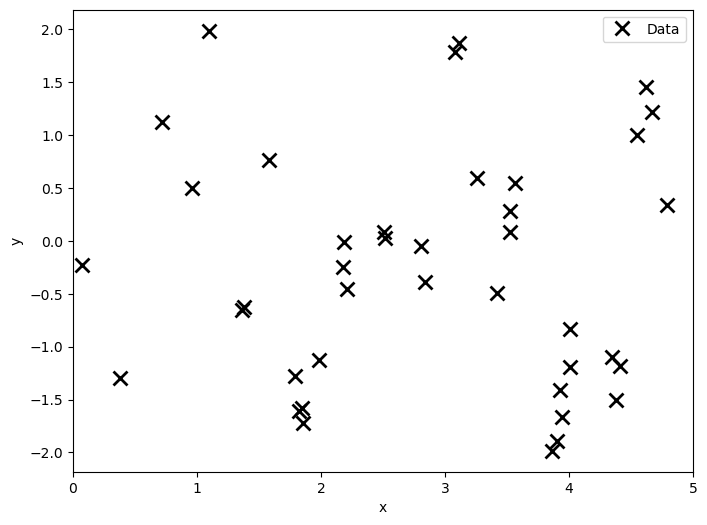

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'kx', markersize=10, markeredgewidth=2, label="Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0,5)
plt.show()

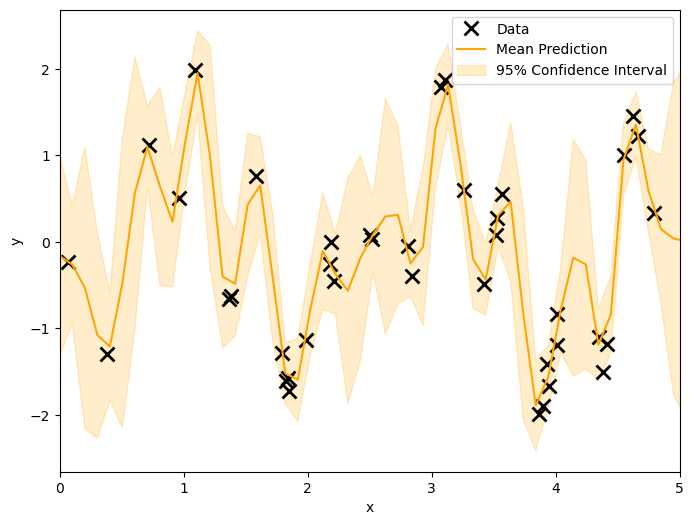

In [5]:
# Predict at new data points
X_new = np.linspace(0, 10, 100).reshape(-1, 1)  # Test inputs
Y_pred, Y_var = gp_model.predict(X_new)  # Predictive mean and variance

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'kx', markersize=10, markeredgewidth=2, label="Data")

plt.plot(X_new, Y_pred, label='Mean Prediction', color='orange')
plt.fill_between(X_new.flatten(), (Y_pred - 2*np.sqrt(Y_var)).flatten(), (Y_pred + 2*np.sqrt(Y_var)).flatten(), color='orange',
                 alpha=0.2, label='95% Confidence Interval')
# plt.title("Gaussian Process Regression with GPy")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0,5)
plt.show()

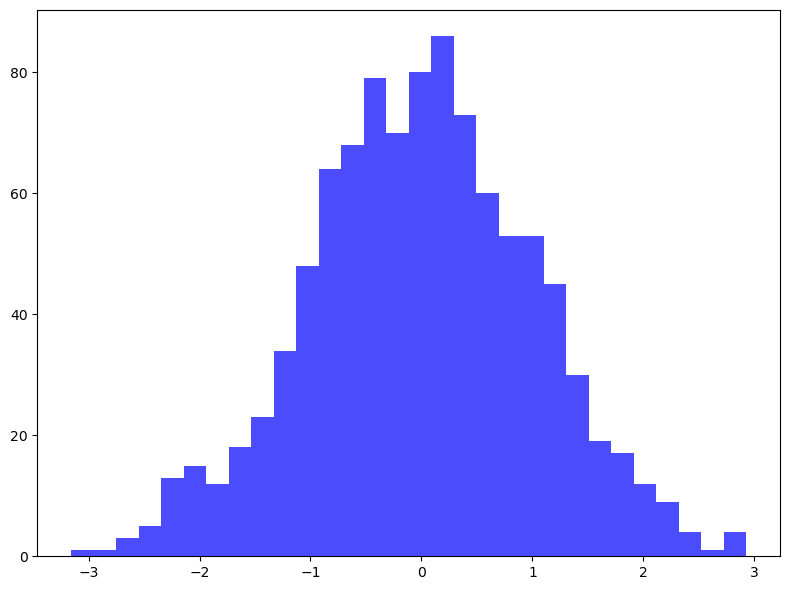

In [10]:
# Generating random data for histograms
data1 = np.random.normal(0, 1, 1000)  # Normal distribution
data2 = np.random.exponential(1, 1000)  # Exponential distribution
data3 = np.random.uniform(-3, 3, 1000)  # Uniform distribution

# Creating plots
plt.figure(figsize=(8, 6))

# Normal distribution
plt.hist(data1, bins=30, color='blue', alpha=0.7)
# plt.title('Normal Distribution')

# Exponential distribution
# axs[1].hist(data2, bins=30, color='green', alpha=0.7)
# axs[1].set_title('Exponential Distribution')
#
# # Uniform distribution
# axs[2].hist(data3, bins=30, color='red', alpha=0.7)
# axs[2].set_title('Uniform Distribution')

# Display the histograms
plt.tight_layout()
plt.show()